In [2]:
!pip install xgboost tensorflow scikit-learn

In [65]:
import tensorflow as tf
import numpy as np
import xgboost
from sklearn.metrics import mean_absolute_error


# Prediksi Harga Barang

In [35]:
data_price_prediction = np.load("data/fix/price_prediction.npz", allow_pickle=True)
train_data_price_prediction = data_price_prediction['train'].tolist()
test_data_price_prediction = data_price_prediction['test'].tolist()
val_data_price_prediction = data_price_prediction['val'].tolist()

## DL (Biasa)

In [92]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=train_data_price_prediction['x'].shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_data_price_prediction['x'], train_data_price_prediction['y'], validation_data=(val_data_price_prediction['x'], val_data_price_prediction['y']), epochs=50, batch_size=32)


Epoch 1/50


/opt/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2940/2940 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 40599.0820 - mae: 94.6230 - val_loss: 30637.6270 - val_mae: 74.7905
Epoch 2/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 28669.4355 - mae: 80.0973 - val_loss: 30289.8086 - val_mae: 73.3697
Epoch 3/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 29279.7715 - mae: 79.2846 - val_loss: 30531.9941 - val_mae: 70.9820
Epoch 4/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 30300.4863 - mae: 79.9191 - val_loss: 31337.5820 - val_mae: 69.9411
Epoch 5/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 31680.9531 - mae: 80.7472 - val_loss: 31175.8203 - val_mae: 69.2480
Epoch 6/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 29122.1992 - mae: 79.3285 - val_loss: 30078.2422 - val_mae: 70.9860
Epoch 7/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 30684.8320 - mae: 78.9644 - val_loss: 30510.5430 - val_mae: 69.9207
Epoch 8/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 28978.2793 - mae: 77.9839 - val_l

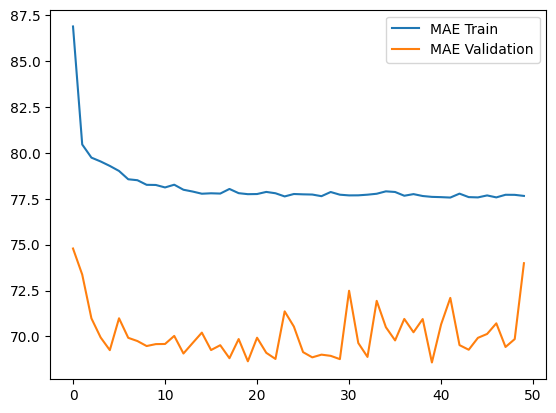

In [93]:
import matplotlib.pyplot as plt

plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.legend(['MAE Train', 'MAE Validation'])
plt.show()

In [94]:
loss, mae = model.evaluate(test_data_price_prediction['x'], test_data_price_prediction['y'])
print(f"Mean Absolute Error: {mae}")
print(f"Loss: {loss}")

368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32599.0059 - mae: 76.6810
Mean Absolute Error: 76.33528137207031
Loss: 33725.75


## XGBOOST

In [46]:
d_train = xgboost.DMatrix(train_data_price_prediction['x'], label=train_data_price_prediction['y'])
d_val = xgboost.DMatrix(val_data_price_prediction['x'], label=val_data_price_prediction['y'])
d_test = xgboost.DMatrix(test_data_price_prediction['x'], label=test_data_price_prediction['y'])

In [61]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'learning_rate': 0.1,
    'max_depth': 6,
    'random_state': 42
}

evals = [(d_train, 'train'), (d_val, 'eval')]
history_xgb = {}

In [62]:
xgb_model = xgboost.train(
    params,
    d_train,
    num_boost_round=500,
    early_stopping_rounds=10,
    evals=evals,
    evals_result=history_xgb,
    verbose_eval=True
)

[0]	train-mae:86.78262	eval-mae:86.05561
[1]	train-mae:83.98276	eval-mae:83.28477
[2]	train-mae:81.56173	eval-mae:80.99898
[3]	train-mae:79.57002	eval-mae:79.08382
[4]	train-mae:77.68792	eval-mae:77.32235
[5]	train-mae:76.13527	eval-mae:75.82235
[6]	train-mae:74.77405	eval-mae:74.54170
[7]	train-mae:73.62289	eval-mae:73.43799
[8]	train-mae:72.59172	eval-mae:72.47529
[9]	train-mae:71.55528	eval-mae:71.47107
[10]	train-mae:70.68237	eval-mae:70.65318
[11]	train-mae:69.96599	eval-mae:69.95793
[12]	train-mae:69.36772	eval-mae:69.39007
[13]	train-mae:68.71581	eval-mae:68.74252
[14]	train-mae:68.13809	eval-mae:68.20646
[15]	train-mae:67.60729	eval-mae:67.72511
[16]	train-mae:67.09603	eval-mae:67.24654
[17]	train-mae:66.50873	eval-mae:66.67317
[18]	train-mae:66.03415	eval-mae:66.20080
[19]	train-mae:65.57717	eval-mae:65.77277
[20]	train-mae:65.25214	eval-mae:65.45526
[21]	train-mae:64.81843	eval-mae:65.02871
[22]	train-mae:64.62003	eval-mae:64.84150
[23]	train-mae:64.25373	eval-mae:64.45711
[2

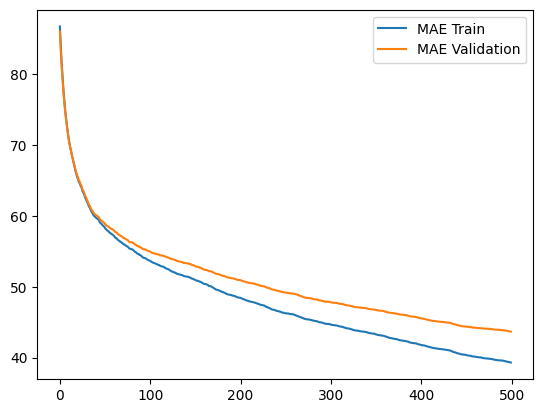

In [63]:
history_xgb_train = history_xgb['train']['mae']
history_xgb_val = history_xgb['eval']['mae']

plt.plot(history_xgb_train)
plt.plot(history_xgb_val)
plt.legend(['MAE Train', 'MAE Validation'])
plt.show()

In [69]:
y_pred = xgb_model.predict(d_test)
mae = mean_absolute_error(test_data_price_prediction['y'], y_pred)
print(f"Test Set Mean Absolute Error: {mae}")


Test Set Mean Absolute Error: 45.32677039254279


In [74]:
import os

os.makedirs("model")
xgb_model.save_model("model/model_price_prediction.json")

In [95]:
model.save("model/dl_model_price_prediction.h5")

# Prediksi Lama Pengiriman Barang

In [70]:
data_delivery_prediction = np.load("data/fix/delivery_prediction.npz", allow_pickle=True)

train_data_delivery_prediction = data_delivery_prediction['train'].tolist()
test_data_delivery_prediction = data_delivery_prediction['test'].tolist()
val_data_delivery_prediction = data_delivery_prediction['val'].tolist()

## DL (Biasa)

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=train_data_delivery_prediction['x'].shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_data_delivery_prediction['x'], train_data_delivery_prediction['y'], validation_data=(val_data_delivery_prediction['x'], val_data_delivery_prediction['y']), epochs=50, batch_size=32)


Epoch 1/50


/opt/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2940/2940 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 10859.7168 - mae: 39.0121 - val_loss: 931.6887 - val_mae: 9.2114
Epoch 2/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1079.0991 - mae: 11.5161 - val_loss: 939.7001 - val_mae: 9.4913
Epoch 3/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1009.7411 - mae: 10.4075 - val_loss: 906.4936 - val_mae: 8.7682
Epoch 4/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 910.3483 - mae: 9.2908 - val_loss: 903.6764 - val_mae: 8.9293
Epoch 5/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 917.5341 - mae: 9.2409 - val_loss: 921.0913 - val_mae: 8.7545
Epoch 6/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 968.5101 - mae: 9.3696 - val_loss: 910.8484 - val_mae: 8.8445
Epoch 7/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1012.3287 - mae: 9.4001 - val_loss: 915.8203 - val_mae: 8.6040
Epoch 8/50
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1007.6025 - mae: 9.4873 - val_loss: 907.8719 - val_mae: 8.7008
Ep

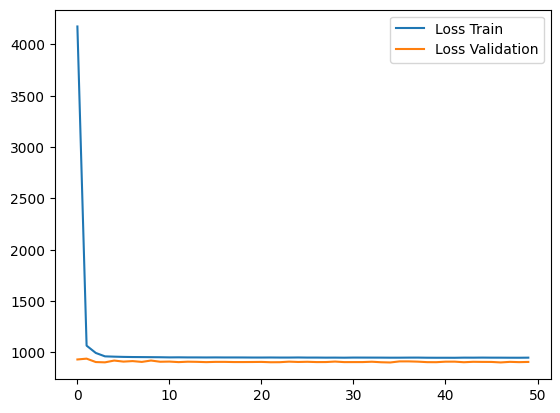

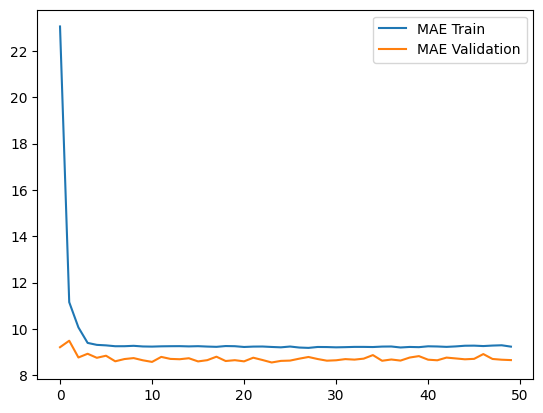

In [76]:
import matplotlib.pyplot as plt


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['Loss Train', 'Loss Validation'])
plt.show()

plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.legend(['MAE Train', 'MAE Validation'])
plt.show()

In [78]:
loss, mae = model.evaluate(test_data_delivery_prediction['x'], test_data_delivery_prediction['y'])
print(f"Mean Absolute Error: {mae}")
print(f"Loss: {loss}")

368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1004.3962 - mae: 8.8795
Mean Absolute Error: 9.00301456451416
Loss: 998.4962768554688


## XGBOOST

In [79]:
d_train = xgboost.DMatrix(train_data_delivery_prediction['x'], label=train_data_delivery_prediction['y'])
d_val = xgboost.DMatrix(val_data_delivery_prediction['x'], label=val_data_delivery_prediction['y'])
d_test = xgboost.DMatrix(test_data_delivery_prediction['x'], label=test_data_delivery_prediction['y'])

In [86]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'learning_rate': 0.01,
    'max_depth': 6,
    'random_state': 42
}

evals = [(d_train, 'train'), (d_val, 'eval')]
history_xgb = {}

In [87]:
xgb_model = xgboost.train(
    params,
    d_train,
    num_boost_round=500,
    evals=evals,
    evals_result=history_xgb,
    verbose_eval=True
)

[0]	train-mae:10.00963	eval-mae:9.87248


[1]	train-mae:9.99141	eval-mae:9.85565
[2]	train-mae:9.97356	eval-mae:9.83926
[3]	train-mae:9.95605	eval-mae:9.82320
[4]	train-mae:9.93877	eval-mae:9.80746
[5]	train-mae:9.92171	eval-mae:9.79169
[6]	train-mae:9.90497	eval-mae:9.77645
[7]	train-mae:9.88850	eval-mae:9.76122
[8]	train-mae:9.87260	eval-mae:9.74656
[9]	train-mae:9.85706	eval-mae:9.73268
[10]	train-mae:9.84180	eval-mae:9.71893
[11]	train-mae:9.82646	eval-mae:9.70515
[12]	train-mae:9.81154	eval-mae:9.69143
[13]	train-mae:9.79674	eval-mae:9.67830
[14]	train-mae:9.78236	eval-mae:9.66506
[15]	train-mae:9.76846	eval-mae:9.65210
[16]	train-mae:9.75468	eval-mae:9.63948
[17]	train-mae:9.74140	eval-mae:9.62718
[18]	train-mae:9.72802	eval-mae:9.61507
[19]	train-mae:9.71479	eval-mae:9.60300
[20]	train-mae:9.70182	eval-mae:9.59114
[21]	train-mae:9.68965	eval-mae:9.58041
[22]	train-mae:9.67744	eval-mae:9.56951
[23]	train-mae:9.66561	eval-mae:9.55906
[24]	train-mae:9.65394	eval-mae:9.54856
[25]	train-mae:9.64254	eval-mae:9.53837
[26]	trai

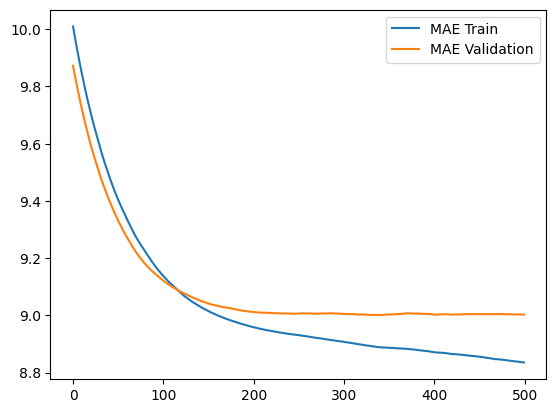

In [88]:
history_xgb_train = history_xgb['train']['mae']
history_xgb_val = history_xgb['eval']['mae']

plt.plot(history_xgb_train)
plt.plot(history_xgb_val)
plt.legend(['MAE Train', 'MAE Validation'])
plt.show()

In [89]:
y_pred = xgb_model.predict(d_test)
mae = mean_absolute_error(test_data_price_prediction['y'], y_pred)
print(f"Test Set Mean Absolute Error: {mae}")

Test Set Mean Absolute Error: 109.37116774641964


In [90]:
xgb_model.save_model("model/xgboost_model_delivery_prediction.json")

In [91]:
model.save("model/dl_model_delivery_prediction.h5")